In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import image, plotting, datasets
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

In [3]:
subjects = [108828,114419,201111,178950,156637,151526]
corr_matrices = []
for sub in subjects:
    corr = np.loadtxt('./harvard_oxford_results/ho_correlation_matrices/ho_correlation{}.csv'.format(sub))
    corr_matrices.append(corr)

In [5]:
ho = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm',symmetric_split=True)
ho_filename = ho.maps
ho_labels = ho.labels
ho_coords = plotting.find_parcellation_cut_coords(labels_img=ho_filename)

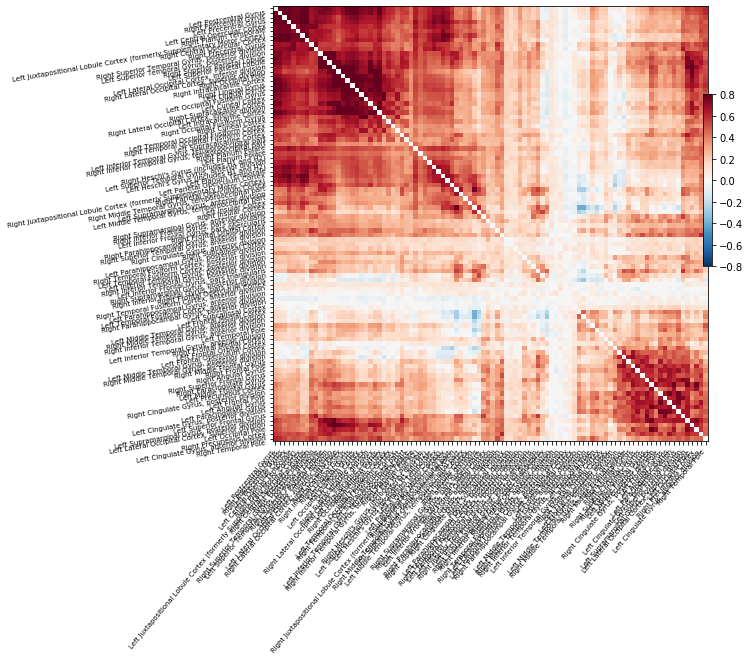

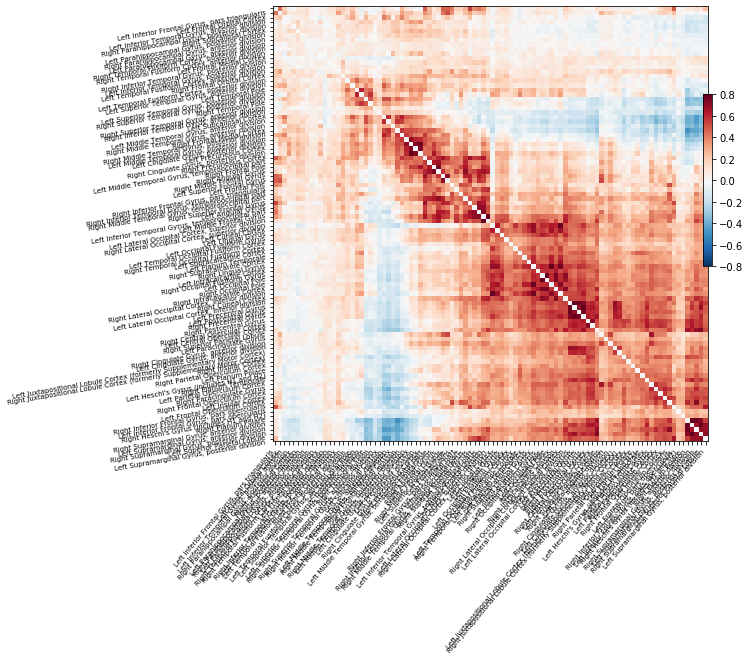

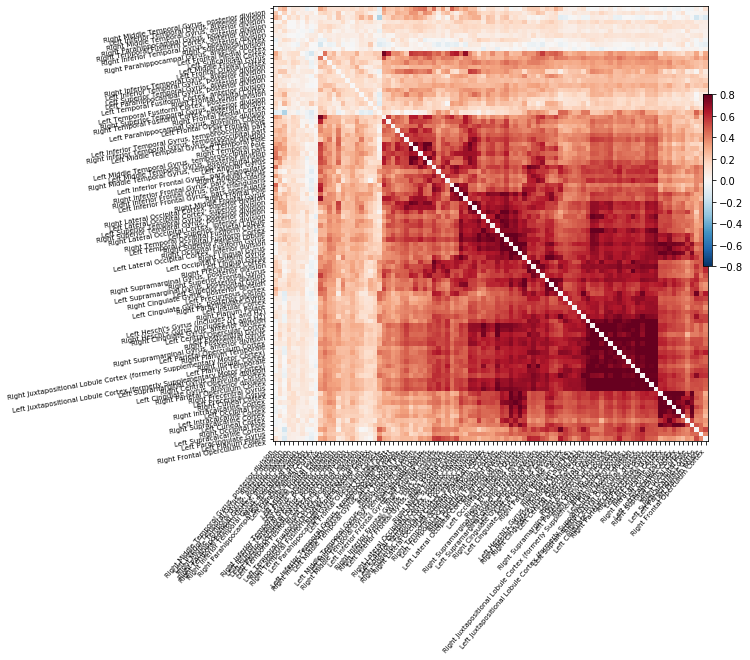

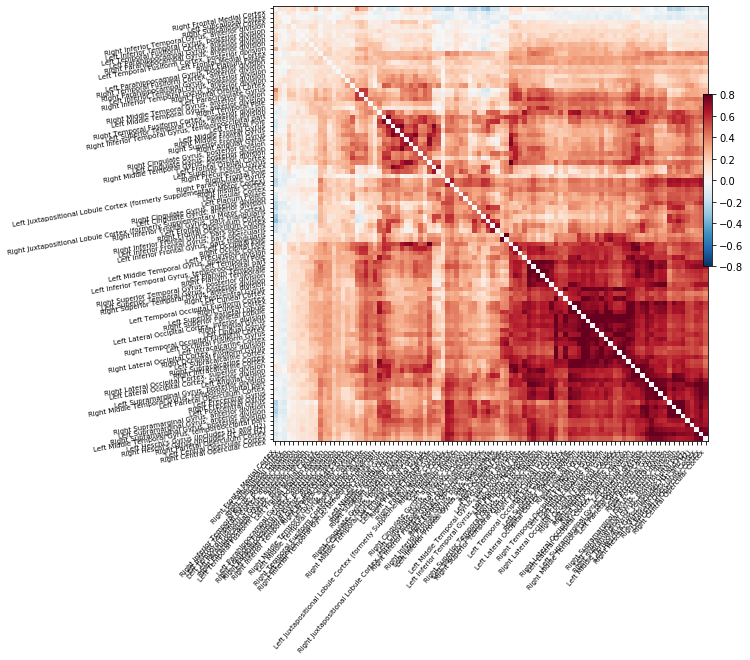

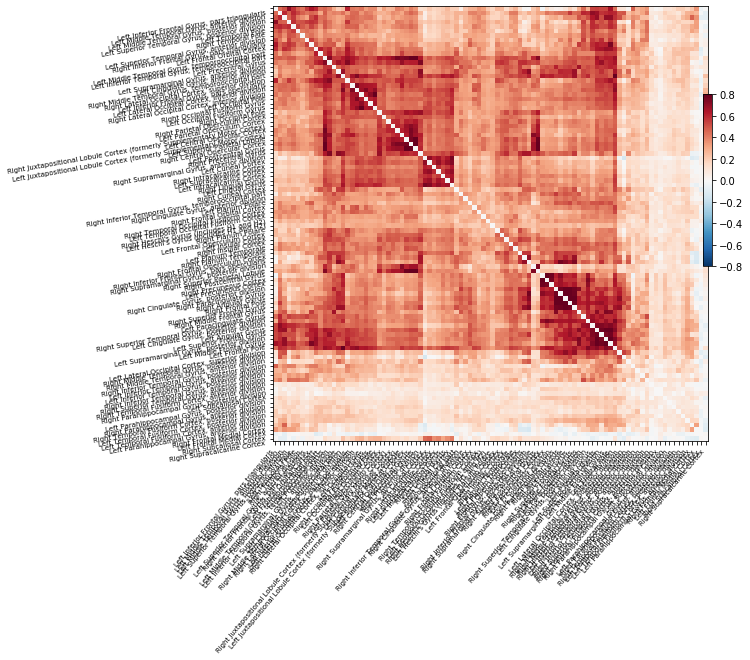

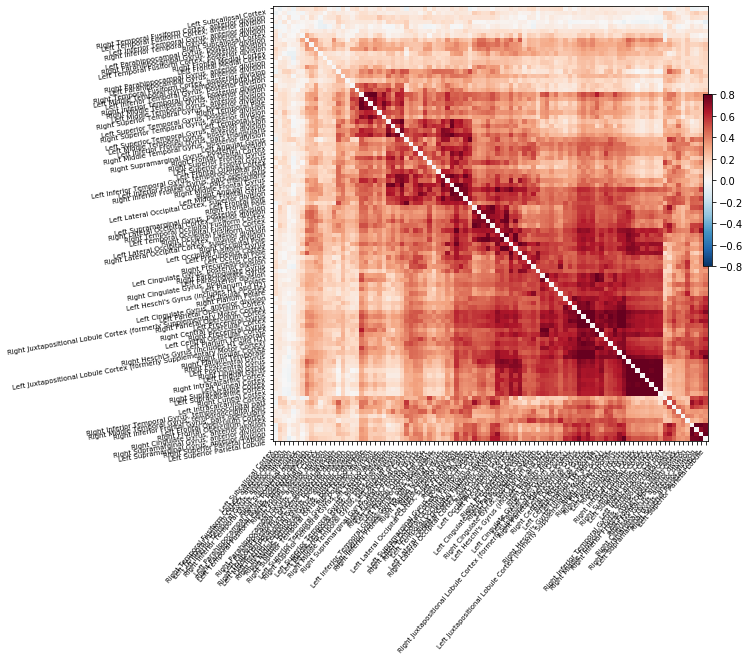

In [6]:
for corr in corr_matrices:
    np.fill_diagonal(corr, 0)
    plotting.plot_matrix(corr, figure=(10, 8), labels=ho_labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

# Visualize Connectome

In [7]:
view = plotting.view_connectome(corr_matrices[0], ho_coords, edge_threshold='80%', edge_cmap = 'Spectral')
view